In [81]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, accuracy_score
from scipy.stats import pearsonr

%matplotlib inline

[Say a feature X1 is independent from the target label Y.
Can we always remove this feature and not lose in predictive performance?](https://twitter.com/AlexGDimakis/status/1326746526954237952)

### X2 = Y + X1

[Simple counterexample: Generate X1 and Y independently, and let X2=Y-X1](https://twitter.com/ChadScherrer/status/1326832318594445313)

In [90]:
def plot_features(X, y):

    fig, ax = plt.subplots(1, 2, figsize=(11, 4))

    for i in range(2):
    
        corr = pearsonr(X[:, i], y)[0]
    
        ax[i].scatter(X[:, i], y, color='b')
        ax[i].set_xlabel(f'x{i + 1}')
        ax[i].set_ylabel('y')
        ax[i].set_title(f'pearson(x{i + 1}, y)={corr:.2f}')

    plt.show()


def test_r2(X, y):
    print(r2_score(y, LinearRegression().fit(X, y).predict(X)))

In [50]:
n = 100

y = np.random.randn(n)
x1 = np.random.randn(n)

x2 = (y - x1)

x2 = x2.reshape(-1, 1)
x1 = x1.reshape(-1, 1)

X = np.hstack((x1, x2))

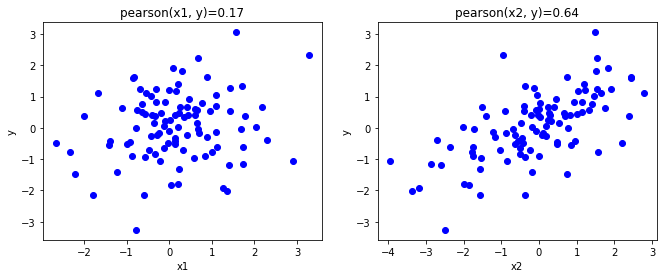

In [53]:
plot_features(X, y)

In [37]:
# model using both x1, x2 -> r2 = 1.0 because y = x1 + x2
test_r2(X, y)

1.0


In [39]:
# model using x1 only
test_r2(x1, y)

1.4105761865890187e-05


In [41]:
# model using x2 only, removing x1 because it has 0 correlation with y
# results in decreased performance
test_r2(x2, y)

0.5009091518081767


### Y = XOR(X1, X2)

[What if Y is a deterministic function of multiple features, yet independent of each of them individually? Consider an example with two binary features, X1 and X2, each Bernoulli(0.5). Take Y=Xor(X1,X2), it's independent of each feature individually.](https://twitter.com/BaronDror/status/1326756222934999040)

In [102]:
def plot_data(X, y):
    
    n = len(X)
    plt.subplots(1, 1, figsize=(6, 3))
    plt.scatter(
        X[:, 0] + np.random.randn(n) / 10,
        X[:, 1] + np.random.randn(n) / 10,
        c=y
    )
    
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('y=xor(x1, x2)')    
    plt.colorbar()
    plt.show()


def test_accuracy(X, y):
    print(accuracy_score(y, DecisionTreeClassifier().fit(X, y).predict(X)))

In [83]:
x1 = np.random.binomial(n=1, p=0.5, size=1000)
x2 = np.random.binomial(n=1, p=0.5, size=1000)

# ^ is xor operator
y = x1 ^ x2

x2 = x2.reshape(-1, 1)
x1 = x1.reshape(-1, 1)
X = np.hstack((x1, x2))

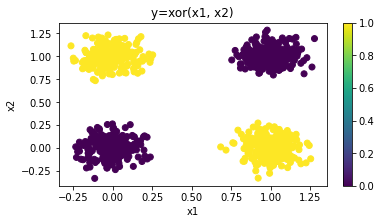

In [101]:
# xor is non-linear
# we need to use a non-linear classifier (e.g. decision tree)

plot_data(X, y)

In [103]:
# no correlation between x1, x2 and y
for i in range(2):
    print(f'x_{i + 1}', pearsonr(X[:, i], y)[0])

x_1 0.010305361381345841
x_2 -0.07004406261741432


In [104]:
# model using both x1, x2 -> r2 = 1.0 because y = xor(x1, x2)
test_accuracy(X, y)

1.0


In [105]:
# model using both x1 only, achieves baseline 0.5 acc
test_accuracy(x1, y)

0.505


In [106]:
# same for a model using x2 only
test_accuracy(x2, y)

0.535
